In [1]:
#import necessary libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all the available columns
pd.set_option('display.max_columns', None)
# Set option to display numbers in normal form (not scientific notation)
#pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
#add scripts to path so that we can call the functions
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "scripts"))
print(sys.path)

['d:\\10Academy-KAIM\\week-4\\notebooks', 'C:\\Program Files\\Python311\\python311.zip', 'C:\\Program Files\\Python311\\DLLs', 'C:\\Program Files\\Python311\\Lib', 'C:\\Program Files\\Python311', 'd:\\10Academy-KAIM\\week-4\\.venv', '', 'd:\\10Academy-KAIM\\week-4\\.venv\\Lib\\site-packages', 'C:\\Users\\kulhab\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Program Files\\Python311\\Lib\\site-packages', 'd:\\10Academy-KAIM\\week-4\\scripts']


In [4]:
# import the classes and functions from the scripts
from eda_customer_purchasing_behavior import EdaCustomerBehavior
sample_submission_ob = EdaCustomerBehavior('../data/sample_submission.csv')
sample_submission_df= sample_submission_ob.load_data()
store_ob = EdaCustomerBehavior('../data/store.csv')
store_df = store_ob.load_data()
test_ob = EdaCustomerBehavior('../data/test.csv')
test_df = test_ob.load_data()
train_ob = EdaCustomerBehavior('../data/train.csv')
train_df = train_ob.load_data()

d:\10Academy-KAIM\week-4\scripts\eda_customer_purchasing_behavior.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(self.path)


### sample submission preprocessing

In [5]:
sample_submission_df.tail()

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [6]:
# Summary information
print(sample_submission_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB
None


In [7]:
# Summary statistics
print(sample_submission_df.describe())

                 Id    Sales
count  41088.000000  41088.0
mean   20544.500000      0.0
std    11861.228267      0.0
min        1.000000      0.0
25%    10272.750000      0.0
50%    20544.500000      0.0
75%    30816.250000      0.0
max    41088.000000      0.0


In [8]:
# Check for missing values
print(sample_submission_df.isna().sum())

Id       0
Sales    0
dtype: int64


### store preprocessing

In [9]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
# Summary information
print(store_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [11]:
# Summary statistics
print(store_df.describe())

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

In [12]:
# Check for missing values
print(store_df.isna().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [13]:
# fill all missing values with the mode
store_df.fillna(store_df.mode().iloc[0], inplace=True)
# Check for missing values
print(store_df.isna().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [14]:
# Convert Month column from float to integer
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].astype(int)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].astype(int)

In [15]:
# Summary information
print(store_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int32  
 5   CompetitionOpenSinceYear   1115 non-null   int32  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(3)
memory usage: 78.5+ KB
None


<Axes: >

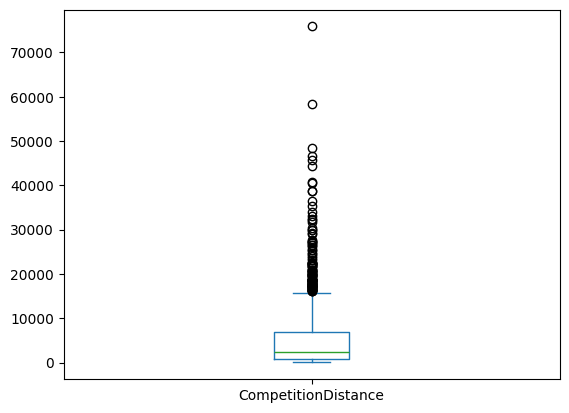

In [16]:
# see if there is an outlier
store_df['CompetitionDistance'].plot(kind='box')

<Axes: >

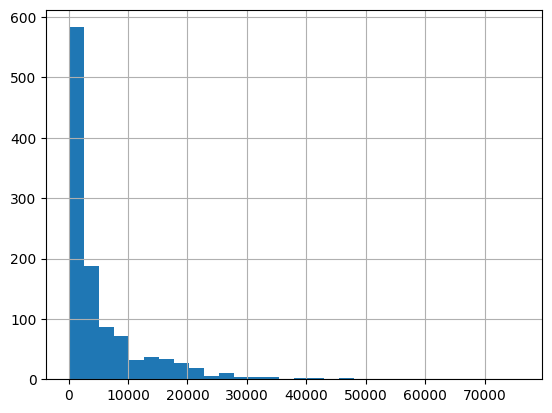

In [17]:
store_df['CompetitionDistance'].hist(bins=30)
#plt.show()

In [18]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4,2015,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


### test preprocessing

In [19]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [20]:
# check data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [21]:
#convert date column to Date
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [22]:
# check statistics summary
test_df.describe()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,2015-08-24 12:00:00,0.854322,0.395833,0.443487
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000
std,11861.228267,320.274496,2.015481,NaN,0.352787,0.489035,0.496802


In [23]:
# check for missing values
test_df.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [24]:
# fill missing values with mode
test_df.fillna(test_df.mode().iloc[0], inplace=True)

### train preprocessing

In [25]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [26]:
# check dataframe info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [27]:
# convert date column to Date
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [28]:
# check missing values
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Analysis

In [29]:
# check for distribution of promotions between train and test data
# Quick check of the Promo column
print(train_df['Promo'].value_counts())
print(test_df['Promo'].value_counts())

Promo
0    629129
1    388080
Name: count, dtype: int64
Promo
0    24824
1    16264
Name: count, dtype: int64


In [30]:
# Calculate proportion of promo days in training and test sets
train_promo_proportion = train_df['Promo'].value_counts(normalize=True)
test_promo_proportion = test_df['Promo'].value_counts(normalize=True)

# Display the results
print("Training Set Promo Proportion:\n", train_promo_proportion)
print("Test Set Promo Proportion:\n", test_promo_proportion)

Training Set Promo Proportion:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Test Set Promo Proportion:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


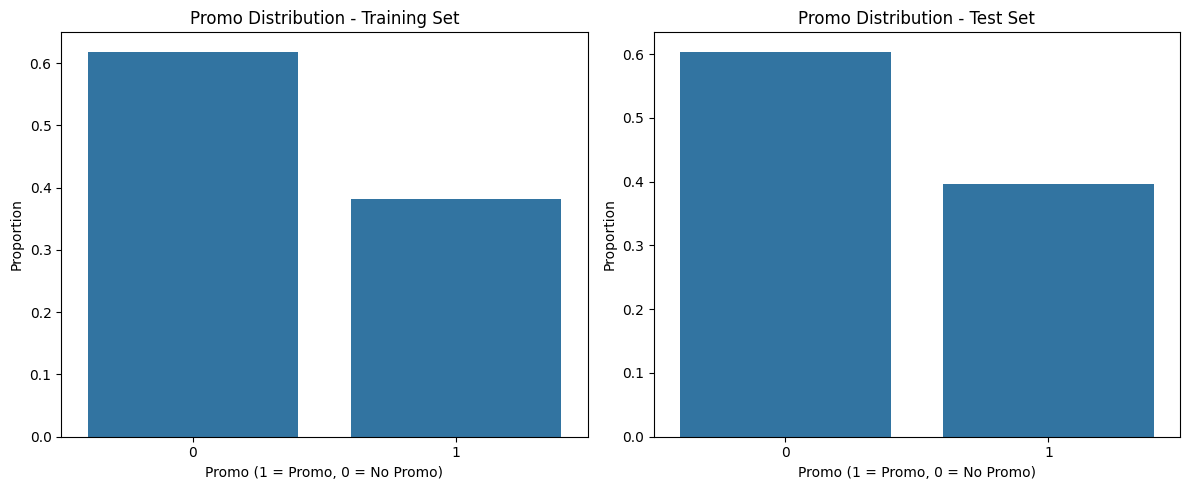

In [31]:
# Plot the Promo distribution for both training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
sns.barplot(x=train_promo_proportion.index, y=train_promo_proportion.values, ax=axes[0])
axes[0].set_title('Promo Distribution - Training Set')
axes[0].set_xlabel('Promo (1 = Promo, 0 = No Promo)')
axes[0].set_ylabel('Proportion')

# Test set distribution
sns.barplot(x=test_promo_proportion.index, y=test_promo_proportion.values, ax=axes[1])
axes[1].set_title('Promo Distribution - Test Set')
axes[1].set_xlabel('Promo (1 = Promo, 0 = No Promo)')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [32]:
#Check & compare sales behavior before, during, and after holidays

# Check for unique values in StateHoliday to understand what kinds of holidays are marked
print(train_df['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [33]:
import importlib
import eda_customer_purchasing_behavior
importlib.reload(eda_customer_purchasing_behavior)

from eda_customer_purchasing_behavior import EdaCustomerBehavior
train_ob = EdaCustomerBehavior('../data/train.csv')

In [34]:
#sales_before, sales_during, sales_after = train_ob.get_sales_before_during_after_holidays(train_df, days=3)

In [35]:
sales_df = pd.read_csv('../sales_holiday_analysis.csv')

In [36]:
sales_before = sales_df['Before Holiday']
sales_during = sales_df['During Holiday']
sales_after = sales_df['After Holiday']

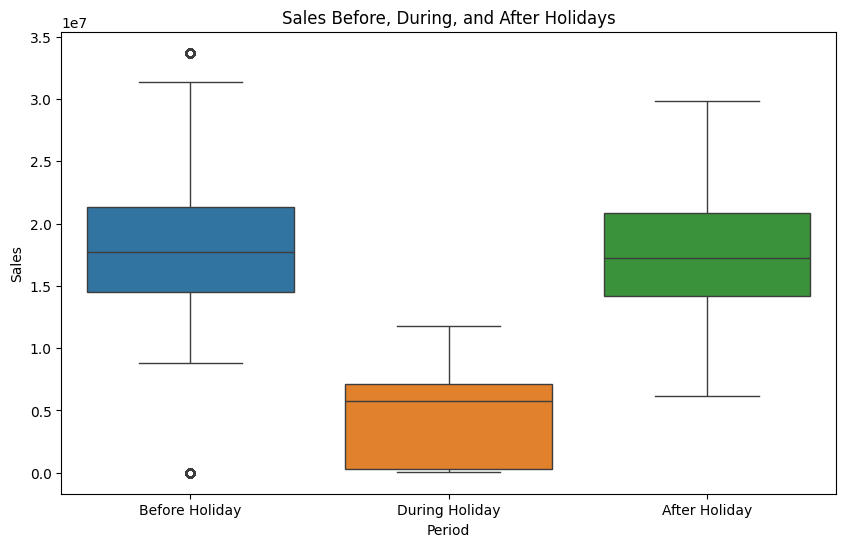

In [37]:
# Plot sales before, during, and after holidays
plt.figure(figsize=(10,6))

# Create a dataframe for easy plotting
sales_df = pd.DataFrame({
    'Before Holiday': sales_before,
    'During Holiday': sales_during,
    'After Holiday': sales_after
})

# Boxplot to compare sales behavior before, during, and after holidays
sns.boxplot(data=sales_df)
plt.title('Sales Before, During, and After Holidays')
plt.ylabel('Sales')
plt.xlabel('Period')
plt.show()


In [38]:
#sales_df.to_csv('../sales_holiday_analysis.csv', index=False)